# ===== Import Libraries =====

In [61]:
import pandas as pd
import seaborn as sns
import numpy as nm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

print("Library berhasil diimport")

Library berhasil diimport


# ===== Load Dataset =====

In [62]:
df = pd.read_csv('dataset/used_cars_processed.csv')
print("✅ Dataset berhasil diload!")
print(f"Shape awal: {df.shape}")

✅ Dataset berhasil diload!
Shape awal: (4009, 22)


# ===== Statistik Deskriptif =====

In [63]:
print("📊 Statistik Deskriptif")

desc_stats = df.describe().round(2)
desc_stats.loc['Q1'] = df[numeric_cols].quantile(0.25)
desc_stats.loc['Q2'] = df[numeric_cols].quantile(0.5)
desc_stats.loc['Q3'] = df[numeric_cols].quantile(0.75)

desc_stats = desc_stats.reindex(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

print("Statistik Deskriptif untuk Atribut Numerik:")
print(desc_stats)

📊 Statistik Deskriptif
Statistik Deskriptif untuk Atribut Numerik:
       model_year     milage       price  brand_encoded  model_encoded  \
count     4009.00    4009.00     4009.00        4009.00        4009.00   
mean         0.00   64717.55    44553.19          23.64         926.87   
std          1.00   52296.60    78710.64          16.38         548.34   
min         -2.64     100.00     2000.00           0.00           0.00   
25%         -0.61   23044.00    17200.00           9.00         480.00   
50%          0.24   52775.00    31000.00          21.00         894.00   
75%          0.75   94100.00    49990.00          36.00        1405.00   
max          1.43  405000.00  2954083.00          56.00        1897.00   

       engine_encoded  transmission_encoded  ext_col_encoded  int_col_encoded  \
count         4009.00               4009.00          4009.00          4009.00   
mean           596.81                 31.18           157.39            39.74   
std            305.47  

# ====== Informasi Dataset =====

In [64]:
# Menampilkan informasi dataset
print("📊 INFORMASI DATASET FINAL")
print(f"Jumlah Record: {df.shape[0]}")
print(f"Jumlah Attribute: {df.shape[1]}")
print(f"Total samples: {len(df)}")
print(f"Total features: {len(df.columns)}")
print(f"\nKolom dataset: {list(df.columns)}")
print(f"\n5 record pertama:")
print(df.head())
print(f"\nStatistik deskriptif:")
print(df[['price', 'milage', 'car_age']].describe())

📊 INFORMASI DATASET FINAL
Jumlah Record: 4009
Jumlah Attribute: 22
Total samples: 4009
Total features: 22

Kolom dataset: ['model_year', 'milage', 'price', 'brand_encoded', 'model_encoded', 'fuel_type_Diesel', 'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid', 'fuel_type_Plug-In Hybrid', 'fuel_type_not supported', 'fuel_type_–', 'engine_encoded', 'transmission_encoded', 'ext_col_encoded', 'int_col_encoded', 'accident_At least 1 accident or damage reported', 'accident_None reported', 'clean_title_Yes', 'car_age', 'price_per_mile', 'value_category']

5 record pertama:
   model_year   milage    price  brand_encoded  model_encoded  \
0   -0.438002  51000.0  10300.0             14           1743   
1    0.919253  34742.0  38005.0             19           1182   
2    1.088910  22372.0  54598.0             27           1325   
3   -0.098688  88900.0  15500.0             20           1242   
4    0.919253   9835.0  34999.0              3           1225   

   fuel_type_Diese

# ===== Data Preparation =====

In [65]:
# Persiapan data untuk modeling
X = df.drop('price', axis=1)
y = df['price']

print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")

# Split data menjadi training dan testing set (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['value_category']
)

print(f"\n✅ Splitting data selesai:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Shape X: (4009, 21)
Shape y: (4009,)

✅ Splitting data selesai:
Training set: 3207 samples
Testing set: 802 samples


# ===== Normalisasi Features =====

In [66]:
# Normalisasi features untuk SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Normalisasi data selesai")

✅ Normalisasi data selesai


# ===== Implementasi Model Regresi =====

In [67]:
print("🧮 IMPLEMENTASI LINEAR REGRESSION")
# Inisialisasi dan training model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
# Prediksi
y_pred_lr = lr_model.predict(X_test_scaled)

print("✅ Linear Regression model selesai ditraining")

print("\n🧮 IMPLEMENTASI SUPPORT VECTOR REGRESSOR (SVR)")
# Inisialisasi dan training model SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
# Prediksi
y_pred_svr = svr_model.predict(X_test_scaled)

print("✅ SVR model selesai ditraining")

🧮 IMPLEMENTASI LINEAR REGRESSION
✅ Linear Regression model selesai ditraining

🧮 IMPLEMENTASI SUPPORT VECTOR REGRESSOR (SVR)
✅ SVR model selesai ditraining


# ===== Evaluasi Model =====

In [68]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = nm.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n📈 HASIL EVALUASI - {model_name}:")
    print(f"MAE (Mean Absolute Error)  : {mae:.4f}")
    print(f"MSE (Mean Squared Error)   : {mse:.4f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"R² Score (Coefficient of Determination): {r2:.4f}")
    
    return mae, mse, rmse, r2

# Evaluasi kedua model
print("=" * 60)
lr_metrics = evaluate_model(y_test, y_pred_lr, "LINEAR REGRESSION")
print("=" * 60)
svr_metrics = evaluate_model(y_test, y_pred_svr, "SUPPORT VECTOR REGRESSOR")
print("=" * 60)


📈 HASIL EVALUASI - LINEAR REGRESSION:
MAE (Mean Absolute Error)  : 21455.4991
MSE (Mean Squared Error)   : 14218726098.9301
RMSE (Root Mean Squared Error): 119242.3000
R² Score (Coefficient of Determination): 0.1264

📈 HASIL EVALUASI - SUPPORT VECTOR REGRESSOR:
MAE (Mean Absolute Error)  : 30430.4047
MSE (Mean Squared Error)   : 16553287659.1593
RMSE (Root Mean Squared Error): 128659.5805
R² Score (Coefficient of Determination): -0.0170


# ===== Perbandingan Performa Model =====

In [69]:
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R² Score'],
    'Linear Regression': lr_metrics,
    'Support Vector Regressor': svr_metrics
})

print("\n📊 PERBANDINGAN PERFORMANSI MODEL:")
print(metrics_df.to_string(index=False))


📊 PERBANDINGAN PERFORMANSI MODEL:
  Metric  Linear Regression  Support Vector Regressor
     MAE       2.145550e+04              3.043040e+04
     MSE       1.421873e+10              1.655329e+10
    RMSE       1.192423e+05              1.286596e+05
R² Score       1.264268e-01             -1.700455e-02


# ===== Visualisasi Hasil Prediksi =====

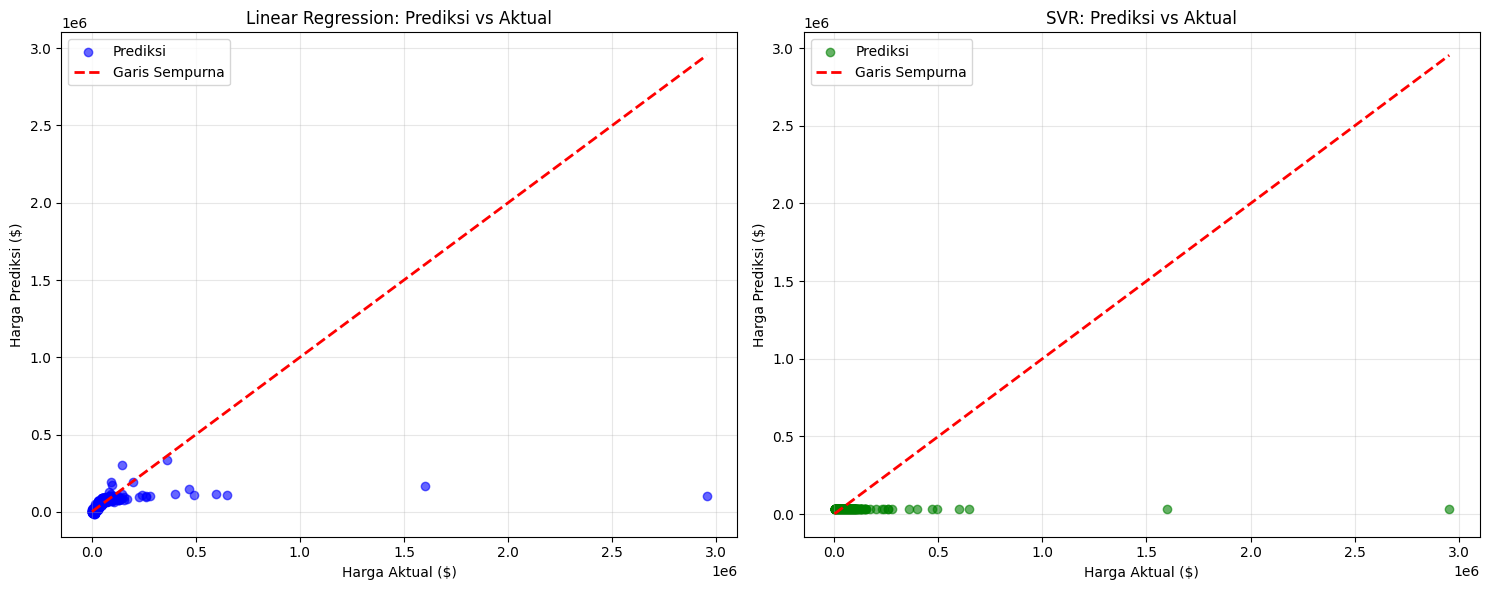

In [70]:
# Visualisasi 1: Scatter plot prediksi vs aktual
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression
axes[0].scatter(y_test, y_pred_lr, alpha=0.6, color='blue', label='Prediksi')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Garis Sempurna')
axes[0].set_xlabel('Harga Aktual ($)')
axes[0].set_ylabel('Harga Prediksi ($)')
axes[0].set_title('Linear Regression: Prediksi vs Aktual')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Support Vector Regressor
axes[1].scatter(y_test, y_pred_svr, alpha=0.6, color='green', label='Prediksi')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Garis Sempurna')
axes[1].set_xlabel('Harga Aktual ($)')
axes[1].set_ylabel('Harga Prediksi ($)')
axes[1].set_title('SVR: Prediksi vs Aktual')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

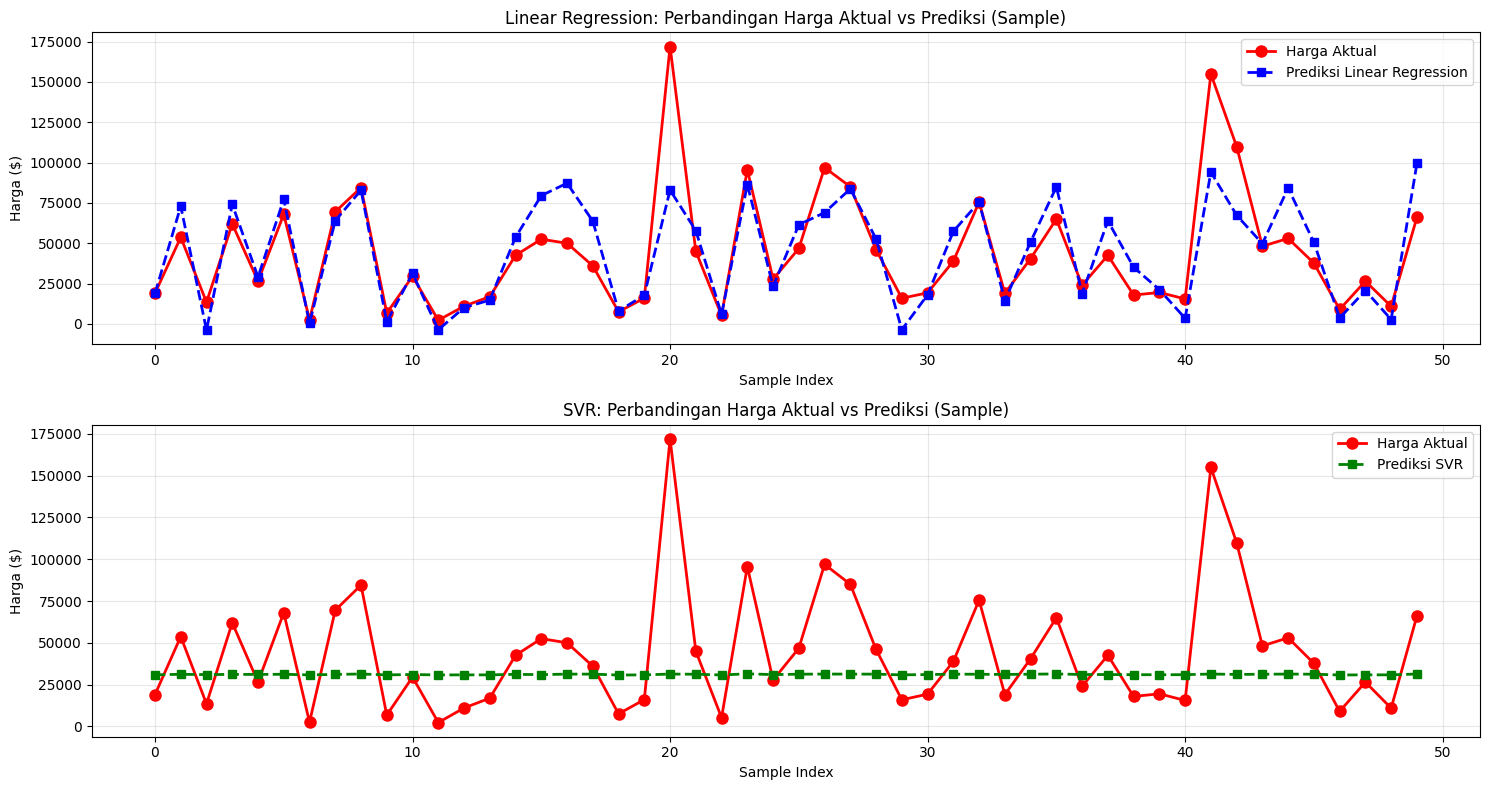

In [71]:
# Visualisasi 5: Plot titik-titik hasil prediksi vs target asli (Sample 50 data pertama)
sample_size = min(50, len(y_test))
sample_indices = nm.random.choice(len(y_test), sample_size, replace=False)

plt.figure(figsize=(15, 8))

# Plot untuk Linear Regression
plt.subplot(2, 1, 1)
plt.plot(range(sample_size), y_test.iloc[sample_indices].values, 'o-', 
         label='Harga Aktual', linewidth=2, markersize=8, color='red')
plt.plot(range(sample_size), y_pred_lr[sample_indices], 's--', 
         label='Prediksi Linear Regression', linewidth=2, markersize=6, color='blue')
plt.xlabel('Sample Index')
plt.ylabel('Harga ($)')
plt.title('Linear Regression: Perbandingan Harga Aktual vs Prediksi (Sample)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot untuk SVR
plt.subplot(2, 1, 2)
plt.plot(range(sample_size), y_test.iloc[sample_indices].values, 'o-', 
         label='Harga Aktual', linewidth=2, markersize=8, color='red')
plt.plot(range(sample_size), y_pred_svr[sample_indices], 's--', 
         label='Prediksi SVR', linewidth=2, markersize=6, color='green')
plt.xlabel('Sample Index')
plt.ylabel('Harga ($)')
plt.title('SVR: Perbandingan Harga Aktual vs Prediksi (Sample)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== Ringkasan Hasil =====

In [72]:
print("🎯 RINGKASAN HASIL POSTTEST 4 - SUPERVISED LEARNING")
print("=" * 70)
print(f"Dataset: Used Cars Price Prediction")
print(f"Total Features: {X.shape[1]}")
print(f"Total Samples: {X.shape[0]}")
print(f"Target Variable: Price (Numerik)")
print("=" * 70)
print("\nMETODE YANG DIIMPLEMENTASIKAN:")
print("1. Linear Regression")
print("2. Support Vector Regressor (SVR)")
print("=" * 70)
print("\nHASIL EVALUASI:")

# Tentukan model terbaik
best_model = "Linear Regression" if lr_metrics[3] > svr_metrics[3] else "SVR"
best_r2 = max(lr_metrics[3], svr_metrics[3])

print(f"✅ MODEL TERBAIK: {best_model} (R² = {best_r2:.4f})")
print("=" * 70)

print("\n📝 KESIMPULAN:")
if best_r2 > 0.7:
    print("• Model memiliki performa yang BAIK dalam memprediksi harga mobil")
elif best_r2 > 0.5:
    print("• Model memiliki performa yang CUKUP dalam memprediksi harga mobil")  
else:
    print("• Model memiliki performa yang PERLU DITINGKATKAN dalam memprediksi harga mobil")

print("• Linear Regression cocok untuk hubungan linear dalam data")
print("• SVR efektif menangkap hubungan non-linear yang kompleks")
print("• Feature engineering dari Posttest 3 berkontribusi pada performa model")

🎯 RINGKASAN HASIL POSTTEST 4 - SUPERVISED LEARNING
Dataset: Used Cars Price Prediction
Total Features: 21
Total Samples: 4009
Target Variable: Price (Numerik)

METODE YANG DIIMPLEMENTASIKAN:
1. Linear Regression
2. Support Vector Regressor (SVR)

HASIL EVALUASI:
✅ MODEL TERBAIK: Linear Regression (R² = 0.1264)

📝 KESIMPULAN:
• Model memiliki performa yang PERLU DITINGKATKAN dalam memprediksi harga mobil
• Linear Regression cocok untuk hubungan linear dalam data
• SVR efektif menangkap hubungan non-linear yang kompleks
• Feature engineering dari Posttest 3 berkontribusi pada performa model


### 🔍 HASIL ANALISIS DATA:

# Gambaran Umum Data:
- Dataset berisi 4009 record dan 12 atribut, dengan 3 atribut numerik (model_year, milage, price).

- Rentang harga mobil bekas berkisar dari $2.000.00 hingga $2.954.083.00, dengan rata-rata sekitar $44.553.19.

- Mobil bekas umumnya berasal dari tahun 1974–2024, dengan rata-rata tahun model 2015.

- Jarak tempuh (milage) sangat bervariasi, dari 100 mil hingga 405.000 mil.

- Terdapat korelasi negatif antara milage dan price, artinya mobil dengan jarak tempuh lebih tinggi cenderung lebih murah.

- Distribusi harga miring ke kanan (right-skewed), menunjukkan banyak mobil dengan harga rendah dan beberapa mobil mewah dengan harga sangat tinggi.